In [ ]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display


from statsmodels.formula import api
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

import warnings 
warnings.filterwarnings('ignore')

In [ ]:
#Importing the dataset
data = pd.read_csv('/content/sample_data/day.csv')

data.drop(['dteday','instant'], axis=1, inplace=True)
display(data.head())

target = 'cnt'
features = [i for i in data.columns if i not in [target]]

original_data = data.copy(deep=True)

print('\n\033[1mInference:\033[0m The Datset consists of {} features & {} samples.'.format(data.shape[1], data.shape[0]))

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600



Inference: The Datset consists of 14 features & 730 samples.


In [ ]:
#Checking the dtypes of all the columns

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 80.0 KB


In [ ]:
#Checking number of unique rows in each feature

data.nunique().sort_values()

yr              2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
mnth           12
temp          498
hum           594
casual        605
windspeed     649
registered    678
atemp         689
cnt           695
dtype: int64

In [ ]:
#Checking number of unique rows in each feature

nu = data[features].nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0; #numerical & categorical features

for i in range(data[features].shape[1]):
    if nu.values[i]<=16:cf.append(nu.index[i])
    else: nf.append(nu.index[i])

print('\n\033[1mInference:\033[0m The Datset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))


Inference: The Datset has 6 numerical & 7 categorical features.


In [ ]:
#Checking the stats of all the columns

display(data.describe())

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


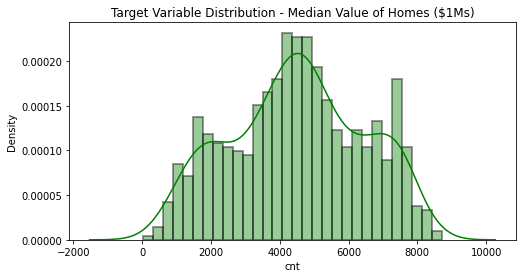

In [ ]:
#Exploratory Data Analysis

#Let us first analyze the distribution of the target variable

plt.figure(figsize=[8,4])
sns.distplot(data[target], color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('Target Variable Distribution - Median Value of Homes ($1Ms)')
plt.show()

Inference:The Target Variable seems to be be normally distributed, averaging around $40000(units)

                               Visualising Categorical Features:                                


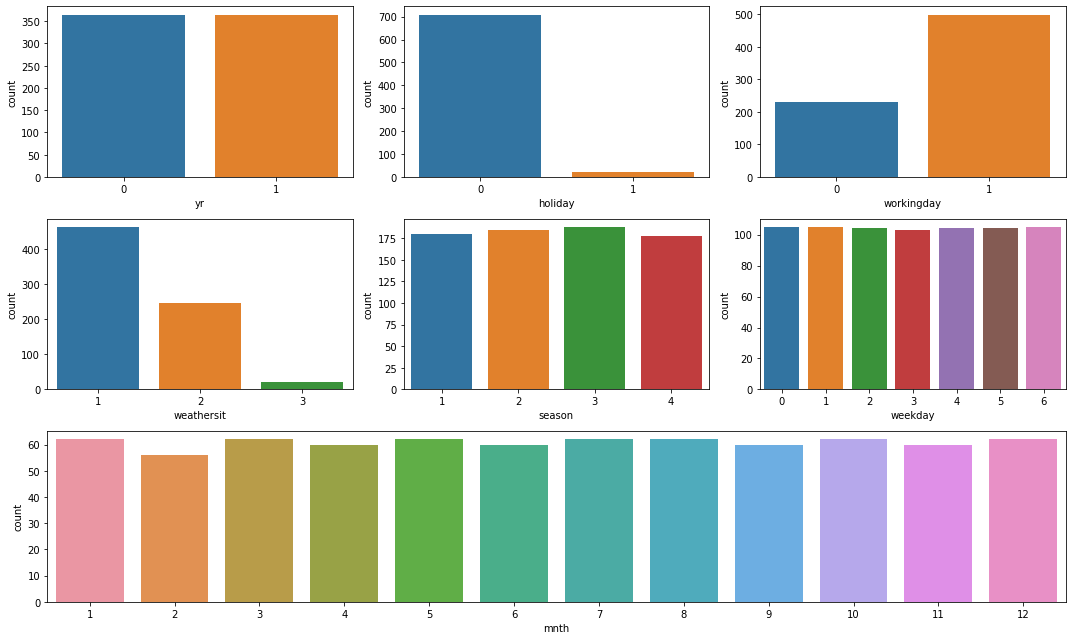

In [ ]:
#Visualising the categorical features 

print('\033[1mVisualising Categorical Features:'.center(100))

n=3
plt.figure(figsize=[15,3*math.ceil(len(cf)/n)])
for i in range(len(cf)):
    if data[cf[i]].nunique()<=8:
        plt.subplot(math.ceil(len(cf)/n),n,i+1)
        sns.countplot(data[cf[i]])
    else:
        plt.subplot(3,1,i-3)
        sns.countplot(data[cf[i]])
plt.tight_layout()
plt.show()


Inference: The categorical features distribution are represented in the above plots.

                                                Numeric Features Distribution                                                 


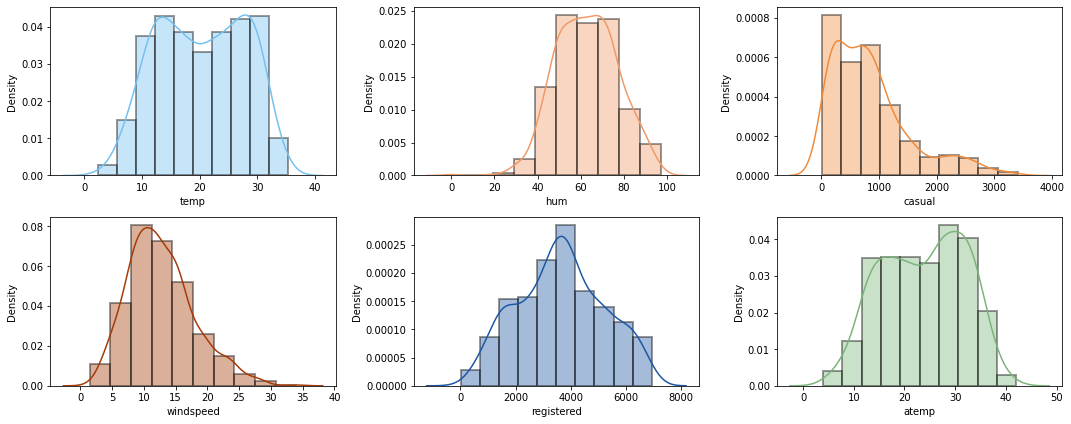

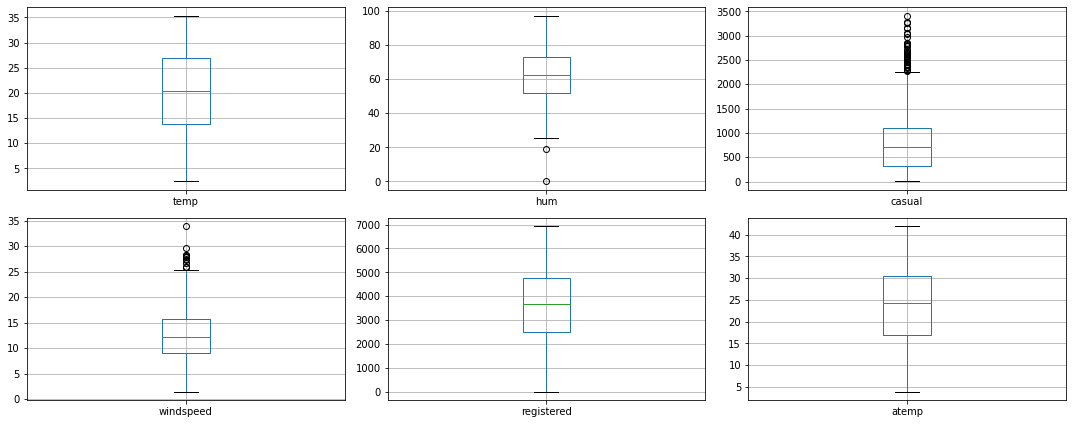

In [ ]:
#Visualising the numeric features 

print('\033[1mNumeric Features Distribution'.center(130))

n=3

plt.figure(figsize=[15,3*math.ceil(len(nf)/n)])
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),n,i+1)
    sns.distplot(data[nf[i]],hist_kws=dict(edgecolor="black", linewidth=2), bins=10, color=list(np.random.randint([255,255,255])/255))
plt.tight_layout()
plt.show()

plt.figure(figsize=[15,3*math.ceil(len(nf)/n)])
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),n,i+1)
    data.boxplot(nf[i])
plt.tight_layout()
plt.show()

Inference: There seem to be some outliers. 

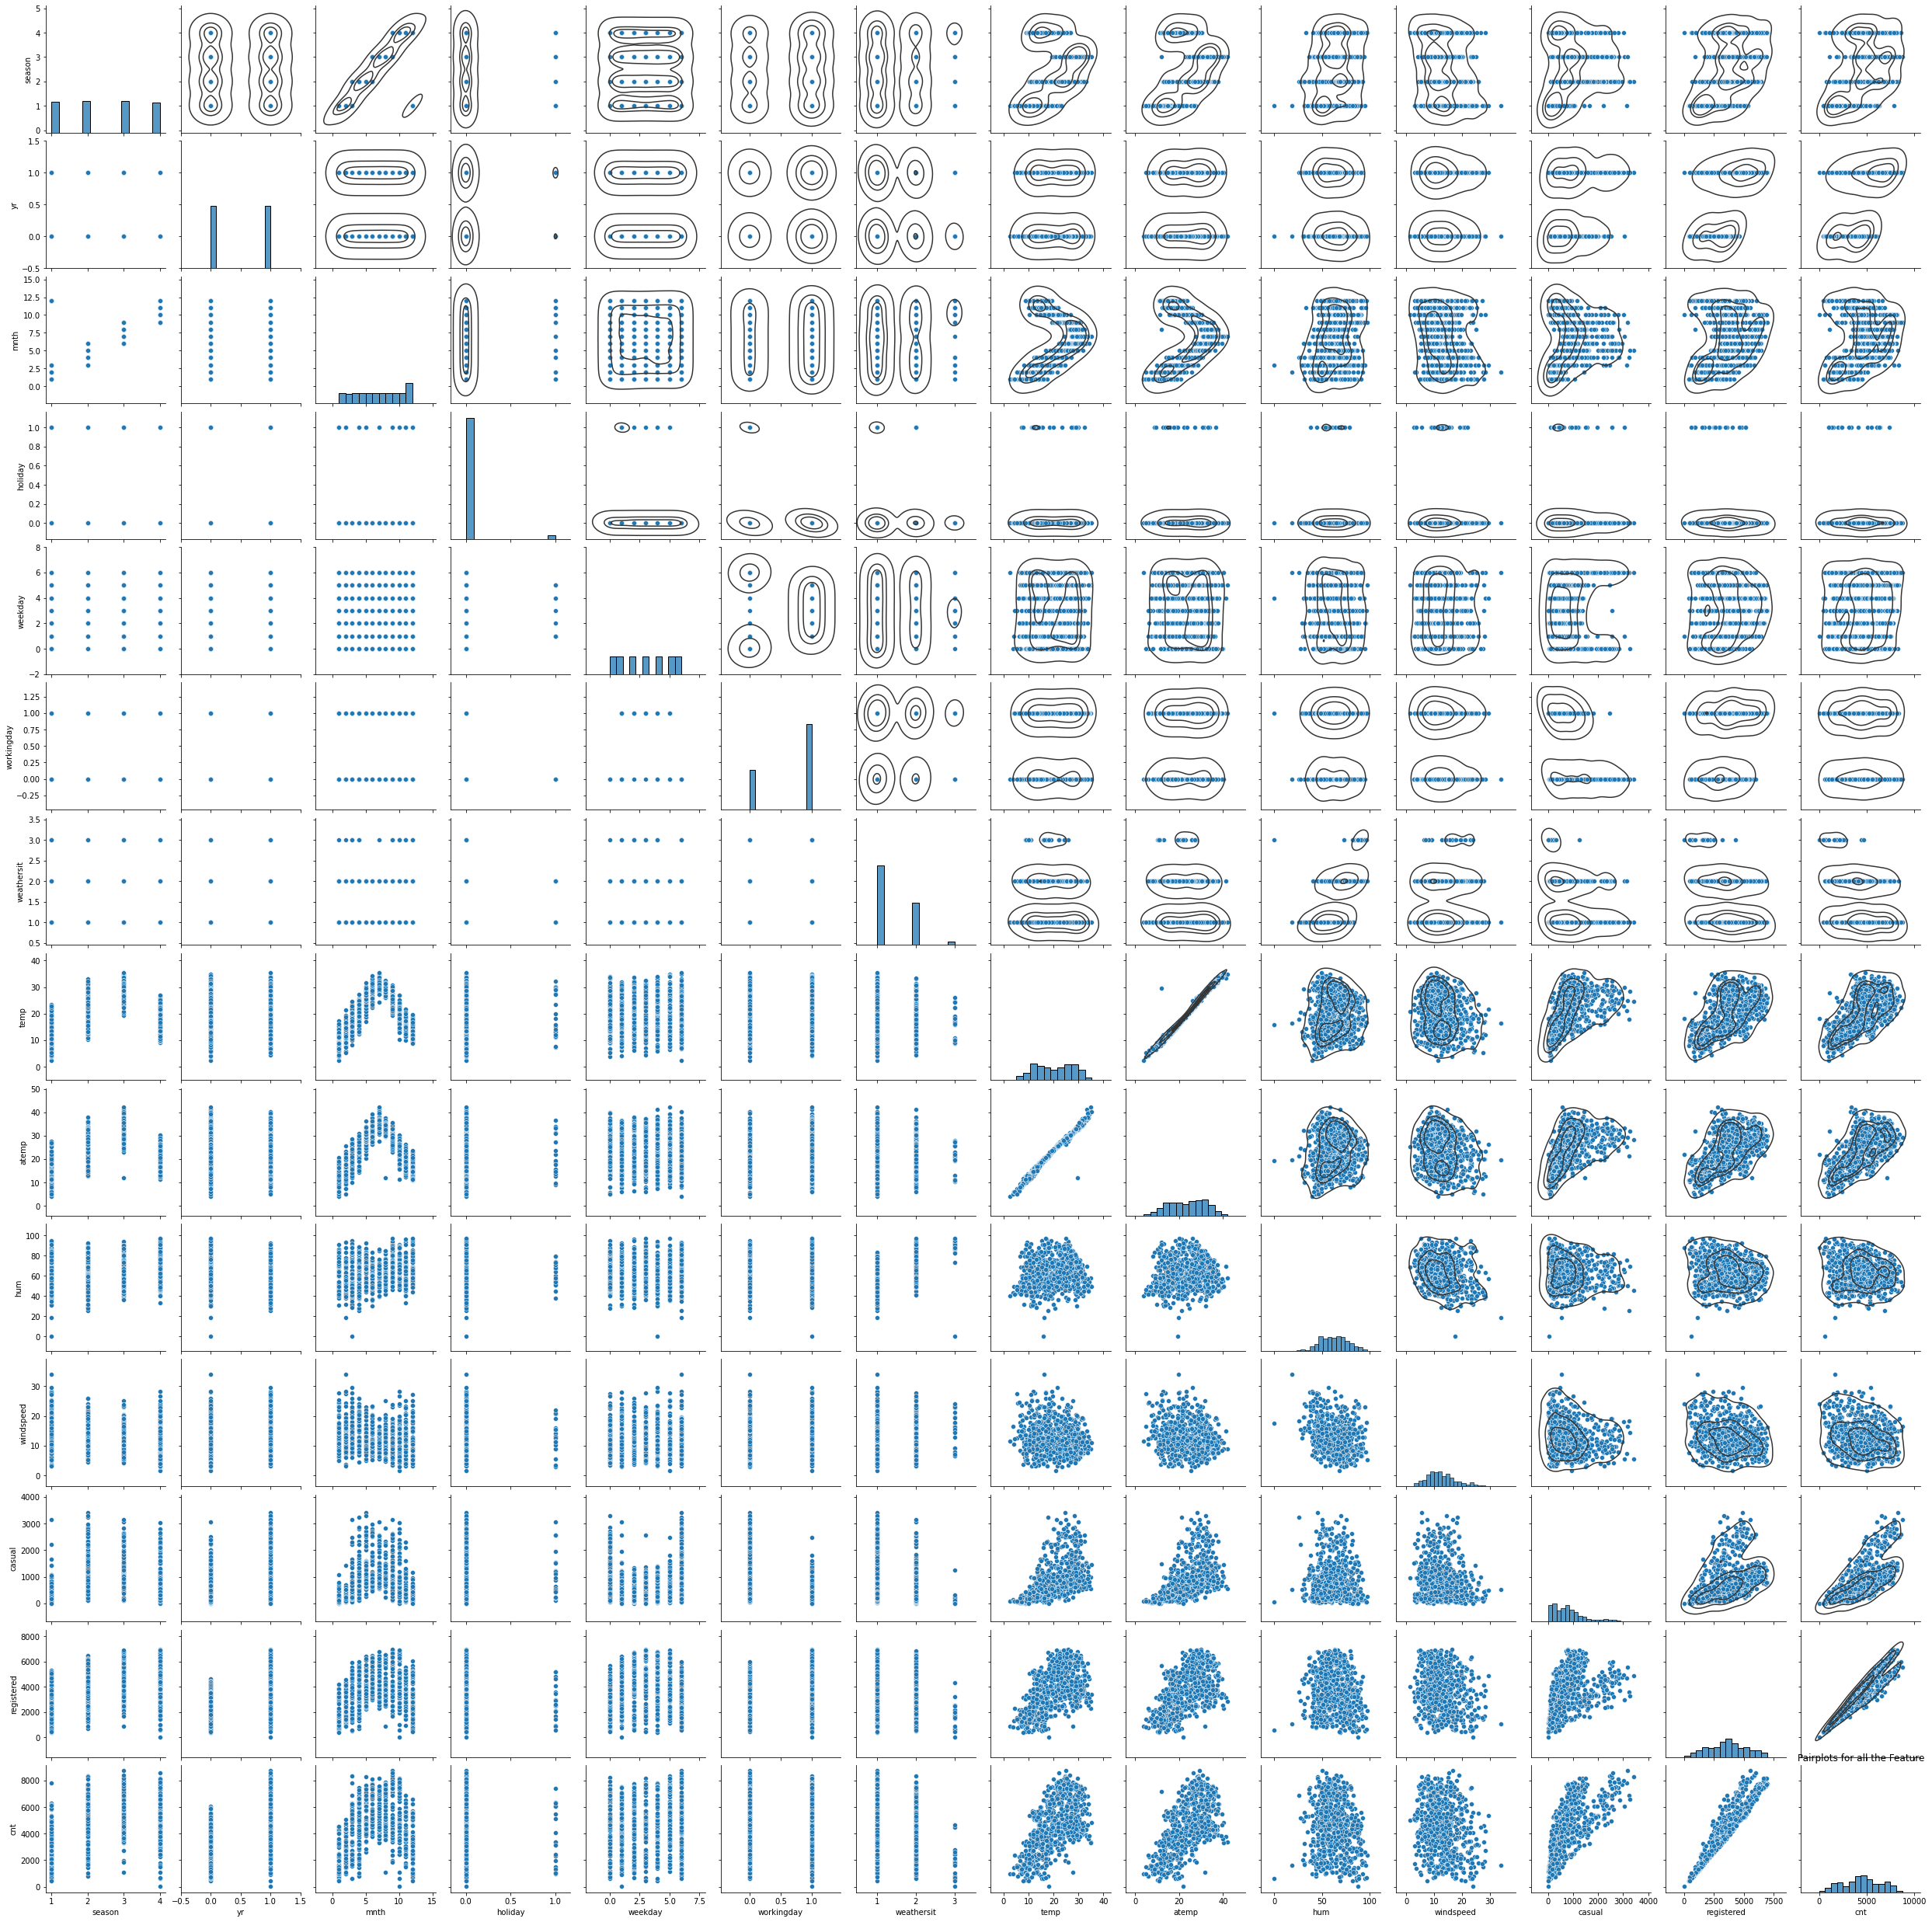

In [ ]:
#Understanding the relationship between all the features

g = sns.pairplot(data)
plt.title('Pairplots for all the Feature')
g.map_upper(sns.kdeplot, levels=4, color=".2")
plt.show()

Inference: Some features have linear relationship

# Preprocessing of Data

In [ ]:
#Duplicate rows removal (if any)

counter = 0
rs,cs = original_data.shape

data.drop_duplicates(inplace=True)

if data.shape==(rs,cs):
    print('\n\033[1mInference:\033[0m The dataset doesn\'t have any duplicates')
else:
    print(f'\n\033[1mInference:\033[0m Number of duplicates dropped/fixed ---> {rs-data.shape[0]}')


Inference: The dataset doesn't have any duplicates


In [ ]:
#Check for empty elements

nvc = pd.DataFrame(data.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = round(nvc['Total Null Values']/data.shape[0],3)*100
print(nvc)

            Total Null Values  Percentage
season                      0         0.0
yr                          0         0.0
mnth                        0         0.0
holiday                     0         0.0
weekday                     0         0.0
workingday                  0         0.0
weathersit                  0         0.0
temp                        0         0.0
atemp                       0         0.0
hum                         0         0.0
windspeed                   0         0.0
casual                      0         0.0
registered                  0         0.0
cnt                         0         0.0


Inference: No inconsistant values.

In [ ]:
#Converting categorical Columns to Numeric

df1 = data.copy()
df3 = df1.copy()

ecc = nvc[nvc['Percentage']!=0].index.values
fcc = [i for i in cf if i not in ecc]
#One-Hot Binay Encoding
ohh=True
dim=True
for i in fcc:
    #print(i)
    if df3[i].nunique()==2:
        if ohh==True: print("\033[1mOne-Hot Encoding on features:\033[0m")
        print(i);ohh=False
        df3[i]=pd.get_dummies(df3[i], drop_first=True, prefix=str(i))
    if (df3[i].nunique()>2 and df3[i].nunique()<17):
        if dim==True: print("\n\033[1mDummy Encoding on features:\033[0m")
        print(i);dim=False
        df3 = pd.concat([df3.drop([i], axis=1), pd.DataFrame(pd.get_dummies(df3[i], drop_first=True, prefix=str(i)))],axis=1)
        
df3.shape

One-Hot Encoding on features:
yr
holiday
workingday

Dummy Encoding on features:
weathersit
season
weekday
mnth


(730, 32)

In [ ]:
#Removal of outlier:

df1 = df3.copy()

#features1 = [i for i in features if i not in ['CHAS','RAD']]
features1 = nf

for i in features1:
    Q1 = df1[i].quantile(0.25)
    Q3 = df1[i].quantile(0.75)
    IQR = Q3 - Q1
    df1 = df1[df1[i] <= (Q3+(1.5*IQR))]
    df1 = df1[df1[i] >= (Q1-(1.5*IQR))]
    df1 = df1.reset_index(drop=True)
display(df1.head())
print('\n\033[1mInference:\033[0m\nBefore removal of outliers, The dataset had {} samples.'.format(df3.shape[0]))
print('After removal of outliers, The dataset now has {} samples.'.format(df1.shape[0]))

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12
0,0,0,0,14.110847,18.18125,80.5833,10.749882,331,654,985,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,...,0,0,0,0,0,0,0,0,0,0



Inference:
Before removal of outliers, The dataset had 730 samples.
After removal of outliers, The dataset now has 672 samples.


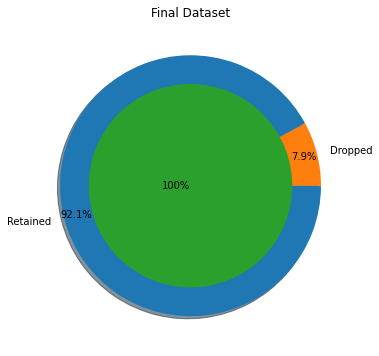


Inference: After the cleanup process, 58 samples were dropped, while retaining 7.95% of the data.


In [ ]:
#Final Dataset size after performing Preprocessing

data = df1.copy()
data.columns=[i.replace('-','_') for i in data.columns]

plt.title('Final Dataset')
plt.pie([data.shape[0], original_data.shape[0]-data.shape[0]], radius = 1, labels=['Retained','Dropped'], counterclock=False, 
        autopct='%1.1f%%', pctdistance=0.9, explode=[0,0], shadow=True)
plt.pie([data.shape[0]], labels=['100%'], labeldistance=-0, radius=0.78)
plt.show()

print(f'\n\033[1mInference:\033[0m After the cleanup process, {original_data.shape[0]-data.shape[0]} samples were dropped, \
while retaining {round(100 - (data.shape[0]*100/(original_data.shape[0])),2)}% of the data.')

# Manipulation of Data

In [ ]:
#Splitting the data intro training & testing sets

m=[]
for i in data.columns.values:
    m.append(i.replace(' ','_'))
    
data.columns = m
X = data.drop([target],axis=1)
Y = data[target]
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=100)
Train_X.reset_index(drop=True,inplace=True)

print('Original set  ---> ',X.shape,Y.shape,'\nTraining set  ---> ',Train_X.shape,Train_Y.shape,'\nTesting set   ---> ', Test_X.shape,'', Test_Y.shape)

Original set  --->  (672, 31) (672,) 
Training set  --->  (537, 31) (537,) 
Testing set   --->  (135, 31)  (135,)


In [ ]:
#Feature Scaling (Standardization)

std = StandardScaler()

print('\033[1mStandardardization on Training set'.center(120))
Train_X_std = std.fit_transform(Train_X)
Train_X_std = pd.DataFrame(Train_X_std, columns=X.columns)
display(Train_X_std.describe())

print('\n','\033[1mStandardardization on Testing set'.center(120))
Test_X_std = std.transform(Test_X)
Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)
display(Test_X_std.describe())

                                         Standardardization on Training set                                         


,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,weathersit_2,...,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12
count,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,...,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02
mean,2.894436e-18,1.488567e-17,1.166044e-16,1.199124e-17,-1.554726e-16,3.754497e-16,-2.853087e-17,-4.558737e-17,1.753201e-16,2.026105e-16,...,-2.682522e-16,-1.457555e-16,2.108804e-16,1.620884e-16,6.698552e-17,6.119665e-17,5.354707e-17,1.993026e-16,7.670256e-17,8.435214e-17
std,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,...,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00
min,-9.263539e-01,-1.636113e-01,-1.644217e+00,-2.286119e+00,-2.323698e+00,-2.487149e+00,-2.286649e+00,-1.411974e+00,-2.269189e+00,-6.952880e-01,...,-3.133042e-01,-2.798451e-01,-2.912876e-01,-2.680602e-01,-3.168751e-01,-3.204207e-01,-2.836951e-01,-2.912876e-01,-3.239418e-01,-3.168751e-01
25%,-9.263539e-01,-1.636113e-01,-1.644217e+00,-8.576950e-01,-8.497981e-01,-7.718838e-01,-7.298249e-01,-8.581299e-01,-7.297237e-01,-6.952880e-01,...,-3.133042e-01,-2.798451e-01,-2.912876e-01,-2.680602e-01,-3.168751e-01,-3.204207e-01,-2.836951e-01,-2.912876e-01,-3.239418e-01,-3.168751e-01
50%,-9.263539e-01,-1.636113e-01,6.081924e-01,-9.448390e-02,-2.696842e-02,-3.761584e-02,-9.691080e-02,-8.739574e-02,-8.059751e-03,-6.952880e-01,...,-3.133042e-01,-2.798451e-01,-2.912876e-01,-2.680602e-01,-3.168751e-01,-3.204207e-01,-2.836951e-01,-2.912876e-01,-3.239418e-01,-3.168751e-01
75%,1.079501e+00,-1.636113e-01,6.081924e-01,9.008183e-01,8.527429e-01,7.172211e-01,6.128465e-01,5.768299e-01,6.781851e-01,1.438253e+00,...,-3.133042e-01,-2.798451e-01,-2.912876e-01,-2.680602e-01,-3.168751e-01,-3.204207e-01,-2.836951e-01,-2.912876e-01,-3.239418e-01,-3.168751e-01
max,1.079501e+00,6.112049e+00,6.081924e-01,2.012161e+00,2.251741e+00,2.423668e+00,2.588831e+00,2.956811e+00,2.111393e+00,1.438253e+00,...,3.191786e+00,3.573406e+00,3.433033e+00,3.730505e+00,3.155817e+00,3.120897e+00,3.524911e+00,3.433033e+00,3.086975e+00,3.155817e+00



                                          Standardardization on Testing set                                          


,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,weathersit_2,...,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12
count,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,...,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000
mean,0.128577,0.022334,-0.025819,0.097623,0.099003,0.137586,-0.135094,0.084897,0.074969,0.189736,...,-0.131559,0.119751,0.039763,0.235463,-0.136810,-0.065508,0.054848,0.094938,-0.121813,-0.008191
std,1.005309,1.068085,1.016730,0.953623,0.939262,0.939658,0.977444,1.057592,0.988668,1.055089,...,0.780071,1.179138,1.063827,1.331528,0.772860,0.904608,1.087903,1.139684,0.808348,0.991951
min,-0.926354,-0.163611,-1.644217,-2.085856,-2.204964,-2.237494,-1.867442,-1.342259,-1.919426,-0.695288,...,-0.313304,-0.279845,-0.291288,-0.268060,-0.316875,-0.320421,-0.283695,-0.291288,-0.323942,-0.316875
25%,-0.926354,-0.163611,-1.644217,-0.721565,-0.684823,-0.554541,-0.812458,-0.762272,-0.643073,-0.695288,...,-0.313304,-0.279845,-0.291288,-0.268060,-0.316875,-0.320421,-0.283695,-0.291288,-0.323942,-0.316875
50%,1.079501,-0.163611,0.608192,0.191166,0.253632,0.135677,-0.293537,-0.131936,0.100727,-0.695288,...,-0.313304,-0.279845,-0.291288,-0.268060,-0.316875,-0.320421,-0.283695,-0.291288,-0.323942,-0.316875
75%,1.079501,-0.163611,0.608192,0.896352,0.856560,0.778896,0.467516,0.596195,0.756929,1.438253,...,-0.313304,-0.279845,-0.291288,-0.268060,-0.316875,-0.320421,-0.283695,-0.291288,-0.323942,-0.316875
max,1.079501,6.112049,0.608192,1.864874,1.925724,2.408985,2.605845,2.935509,2.089256,1.438253,...,3.191786,3.573406,3.433033,3.730505,3.155817,3.120897,3.524911,3.433033,3.086975,3.155817


# Feature Selection

                             Correlation Matrix                             


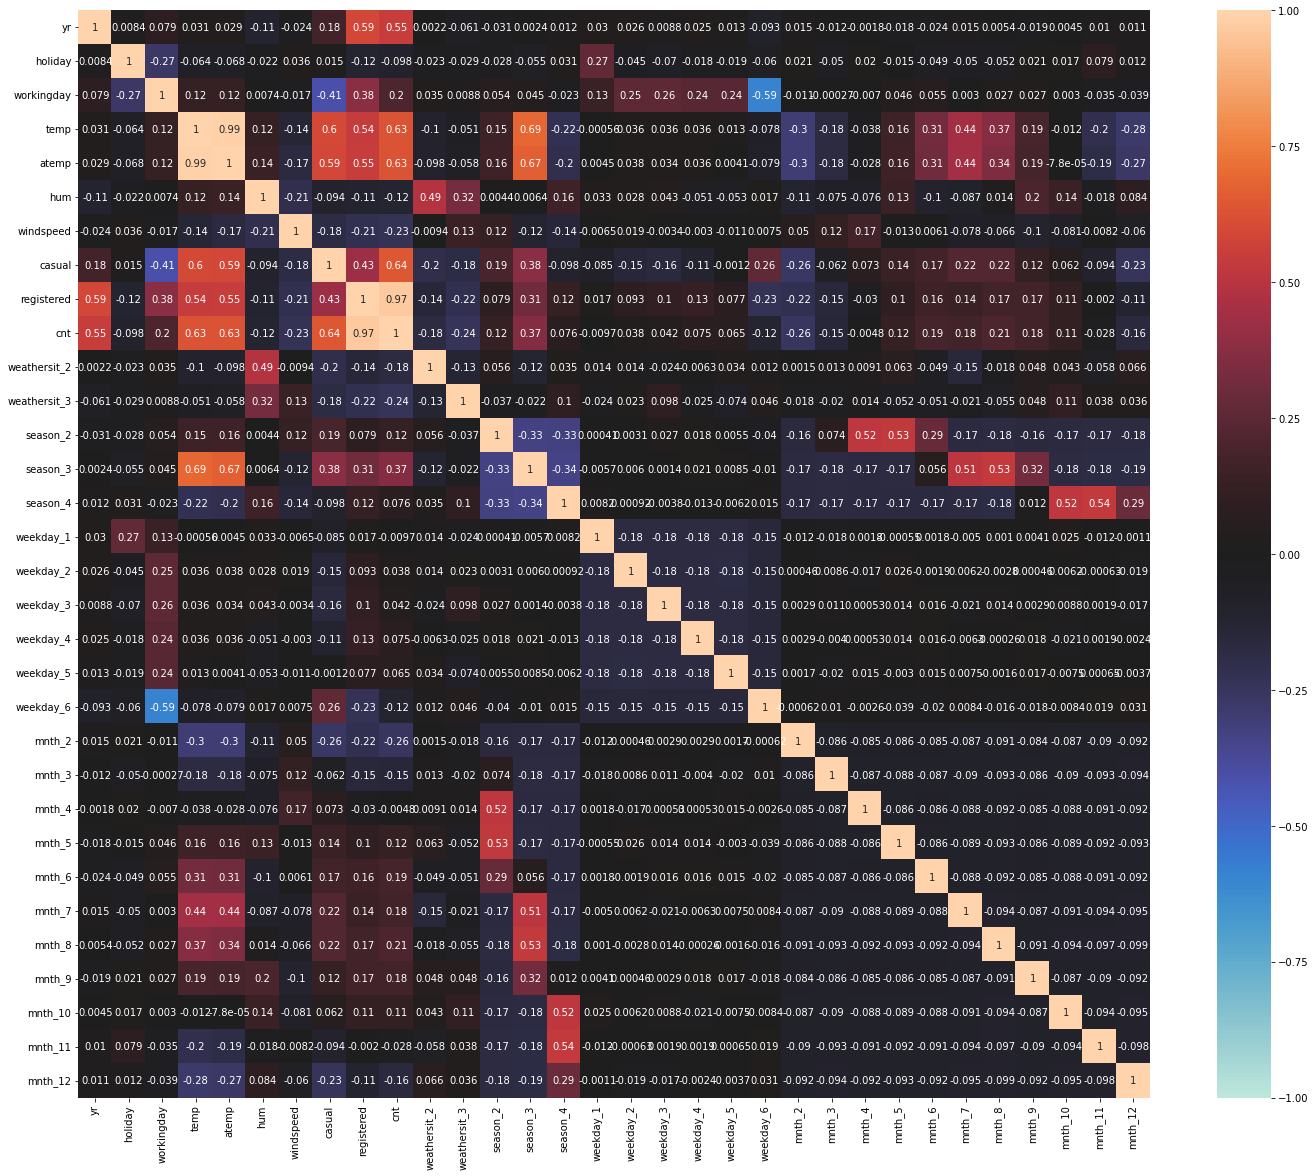

In [ ]:
print('\033[1mCorrelation Matrix'.center(80))
plt.figure(figsize=[24,20])
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, center=0) #cmap='BuGn'
plt.show()

Inference: There seems to be strong multi-correlation between the features. 



In [ ]:
#Testing a Linear Regression model with statsmodels

Train_xy = pd.concat([Train_X_std,Train_Y.reset_index(drop=True)],axis=1)
a = Train_xy.columns.values

API = api.ols(formula='{} ~ {}'.format(target,' + '.join(i for i in Train_X.columns)), data=Train_xy).fit()
#print(API.conf_int())
#print(API.pvalues)
API.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.539e+30
Date:                Tue, 12 Apr 2022   Prob (F-statistic):               0.00
Time:                        12:05:35   Log-Likelihood:                 13323.
No. Observations:                 537   AIC:                        -2.658e+04
Df Residuals:                     506   BIC:                        -2.645e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     4338.8734   1.81e-13    2.4e+16      0.000    4338.873    4338.873
yr            -7.94e-13    3.3e-13     -2.408      0.016   -1.44e-12   -1.46e-13
holiday       1.501e-13   1.96e-13      0.767      0.444   -2.34e-13    5.35e-13
workingday    7.461e-14   2.81e-13      0.265      0.791   -4.78e-13    6.27e-13
temp         -1.165e-12   1.56e-12     -0.746      0.456   -4.23e-12     1.9e-12
atemp        -4.903e-13   1.42e-12     -0.345      0.730   -3.28e-12     2.3e-12
hum          -5.613e-13   2.84e-13     -1.978      0.049   -1.12e-12   -3.69e-15
windspeed    -2.984e-13   2.18e-13     -1.371      0.171   -7.26e-13    1.29e-13
casual         516.3908   3.86e-13   1.34e+15      0.000     516.391     516.391
registered    1581.0683   5.16e-13   3.06e+15      0.000    1581.068    1581.068
weathersit_2  5.871e-13   2.46e-13      2.390      0.017    1.05e-13    1.07e-12
weathersit_3  2.167e-13   2.39e-13      0.906      0.365   -2.53e-13    6.87e-13
season_2      4.197e-14    4.7e-13      0.089      0.929   -8.82e-13    9.66e-13
season_3      1.325e-12   6.19e-13      2.141      0.033    1.09e-13    2.54e-12
season_4      6.288e-13   5.54e-13      1.134      0.257   -4.61e-13    1.72e-12
weekday_1    -3.482e-13   1.67e-13     -2.085      0.038   -6.76e-13   -2.02e-14
weekday_2     -7.39e-13   1.74e-13     -4.244      0.000   -1.08e-12   -3.97e-13
weekday_3    -3.944e-13   1.77e-13     -2.227      0.026   -7.42e-13   -4.64e-14
weekday_4    -1.386e-13   1.76e-13     -0.787      0.432   -4.84e-13    2.07e-13
weekday_5    -5.631e-13   1.62e-13     -3.466      0.001   -8.82e-13   -2.44e-13
weekday_6    -8.762e-13   2.37e-13     -3.690      0.000   -1.34e-12    -4.1e-13
mnth_2       -7.927e-13    2.4e-13     -3.306      0.001   -1.26e-12   -3.22e-13
mnth_3       -5.824e-13   2.99e-13     -1.949      0.052   -1.17e-12    4.81e-15
mnth_4       -4.259e-13   4.09e-13     -1.041      0.299   -1.23e-12    3.78e-13
mnth_5       -4.112e-13   4.58e-13     -0.898      0.369   -1.31e-12    4.88e-13
mnth_6       -1.364e-12   4.58e-13     -2.976      0.003   -2.26e-12   -4.64e-13
mnth_7       -7.816e-13   5.92e-13     -1.320      0.187   -1.94e-12    3.82e-13
mnth_8       -5.862e-13   5.74e-13     -1.021      0.308   -1.71e-12    5.41e-13
mnth_9       -1.025e-12   4.58e-13     -2.240      0.026   -1.92e-12   -1.26e-13
mnth_10      -5.027e-13    4.2e-13     -1.198      0.232   -1.33e-12    3.22e-13
mnth_11      -8.002e-13   4.29e-13     -1.864      0.063   -1.64e-12    4.32e-14
mnth_12      -3.437e-13   3.38e-13     -1.016      0.310   -1.01e-12    3.21e-13
==============================================================================
Omnibus:                        1.909   Durbin-Watson:                   0.980
Prob(Omnibus):                  0.385   Jarque-Bera (JB):                1.703
Skew:      

Inference: We can fix these multicollinearity with two techniques:

*   Manual Method - Variance Inflation Factor (VIF)
*   Automatic Method - Recursive Feature Elimination (RFE)
*   Feature Elmination using PCA Decomposition







## Manual Method - VIF

Dropped Features -->  ['weekday_2', 'temp', 'season_3', 'registered', 'atemp', 'season_4', 'season_2', 'workingday', 'casual', 'hum', 'mnth_7', 'weekday_1', 'mnth_12', 'mnth_3', 'weekday_3', 'mnth_10', 'mnth_4']


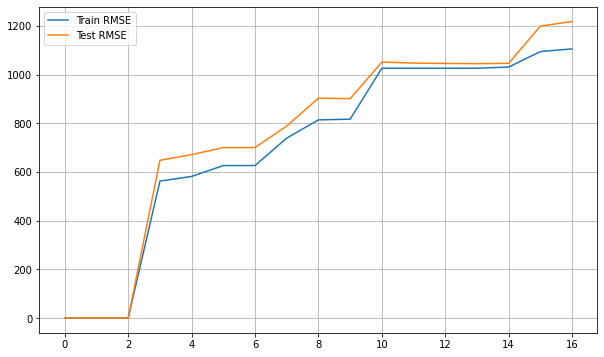

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
Trr=[]; Tss=[]; n=3
order=['ord-'+str(i) for i in range(2,n)]
#Trd = pd.DataFrame(np.zeros((10,n-2)), columns=order)
#Tsd = pd.DataFrame(np.zeros((10,n-2)), columns=order)

DROP=[];b=[]

for i in range(len(Train_X_std.columns)-1):
    vif = pd.DataFrame()
    X = Train_X_std.drop(DROP,axis=1)
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    vif.reset_index(drop=True, inplace=True)
    if vif.loc[0][1]>=1.1:
        DROP.append(vif.loc[0][0])
        LR = LinearRegression()
        LR.fit(Train_X_std.drop(DROP,axis=1), Train_Y)

        pred1 = LR.predict(Train_X_std.drop(DROP,axis=1))
        pred2 = LR.predict(Test_X_std.drop(DROP,axis=1))
        
        Trr.append(np.sqrt(mean_squared_error(Train_Y, pred1)))
        Tss.append(np.sqrt(mean_squared_error(Test_Y, pred2)))
print('Dropped Features --> ',DROP)
plt.plot(Trr, label='Train RMSE')
plt.plot(Tss, label='Test RMSE')
plt.legend()
plt.grid()
plt.show()

## Automatic Method - RFE

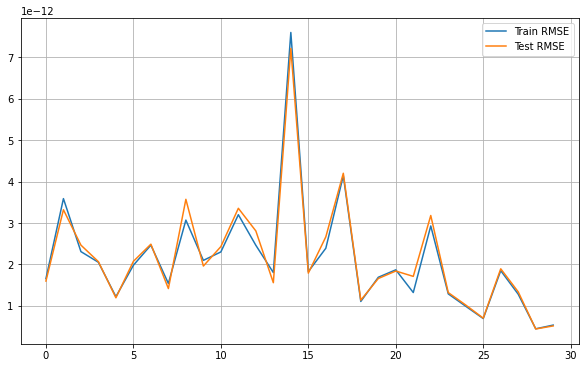

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
Trr=[]; Tss=[]; n=3
order=['ord-'+str(i) for i in range(2,n)]
Trd = pd.DataFrame(np.zeros((10,n-2)), columns=order)
Tsd = pd.DataFrame(np.zeros((10,n-2)), columns=order)

m=data.shape[1]-2
for i in range(m):
    lm = LinearRegression()
    rfe = RFE(lm,n_features_to_select=Train_X_std.shape[1]-i)             # running RFE
    rfe = rfe.fit(Train_X_std, Train_Y)
      
    LR = LinearRegression()
    LR.fit(Train_X_std.loc[:,rfe.support_], Train_Y)
    
    pred1 = LR.predict(Train_X_std.loc[:,rfe.support_])
    pred2 = LR.predict(Test_X_std.loc[:,rfe.support_])

    Trr.append(np.sqrt(mean_squared_error(Train_Y, pred1)))
    Tss.append(np.sqrt(mean_squared_error(Test_Y, pred2)))
        
plt.plot(Trr, label='Train RMSE')
plt.plot(Tss, label='Test RMSE')
plt.legend()
plt.grid()
plt.show()

# Feature Elmination using PCA Decomposition

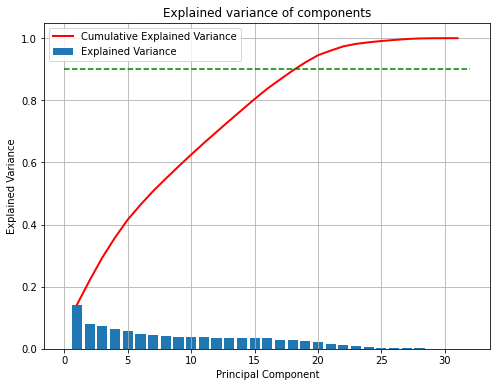

In [ ]:
from sklearn.decomposition import PCA

pca = PCA().fit(Train_X_std)

fig, ax = plt.subplots(figsize=(8,6))
x_values = range(1, pca.n_components_+1)
ax.bar(x_values, pca.explained_variance_ratio_, lw=2, label='Explained Variance')
ax.plot(x_values, np.cumsum(pca.explained_variance_ratio_), lw=2, label='Cumulative Explained Variance', color='red')
plt.plot([0,pca.n_components_+1],[0.9,0.9],'g--')
ax.set_title('Explained variance of components')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Explained Variance')
plt.legend()
plt.grid()
plt.show()

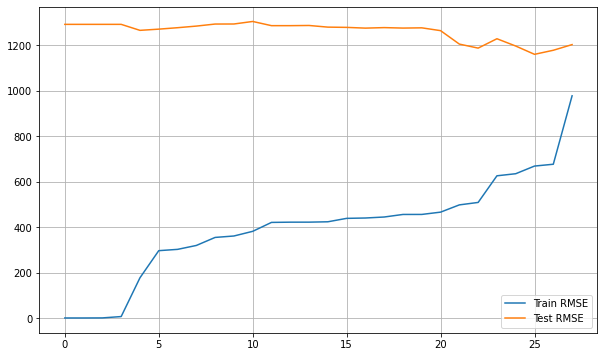

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
Trr=[]; Tss=[]; n=3
order=['ord-'+str(i) for i in range(2,n)]
Trd = pd.DataFrame(np.zeros((10,n-2)), columns=order)
Tsd = pd.DataFrame(np.zeros((10,n-2)), columns=order)
m=data.shape[1]-4

for i in range(m):
    pca = PCA(n_components=Train_X_std.shape[1]-i)
    Train_X_std_pca = pca.fit_transform(Train_X_std)
    Test_X_std_pca = pca.fit_transform(Test_X_std)
    
    LR = LinearRegression()
    LR.fit(Train_X_std_pca, Train_Y)

    pred1 = LR.predict(Train_X_std_pca)
    pred2 = LR.predict(Test_X_std_pca)

    Trr.append(round(np.sqrt(mean_squared_error(Train_Y, pred1)),2))
    Tss.append(round(np.sqrt(mean_squared_error(Test_Y, pred2)),2))

plt.plot(Trr, label='Train RMSE')
plt.plot(Tss, label='Test RMSE')
plt.legend()
plt.grid()
plt.show()

Inference:
It can be seen that the performance of the models is quiet comparable unpon dropping features using VIF, RFE & PCA Techniques. Comparing the RMSE plots, the optimal values were found for dropping most features using manual RFE Technique.

In [ ]:
#Shortlisting the selected Features (with RFE)

lm = LinearRegression()
rfe = RFE(lm,n_features_to_select=2)             # running RFE
rfe = rfe.fit(Train_X_std, Train_Y)

LR = LinearRegression()
LR.fit(Train_X_std.loc[:,rfe.support_], Train_Y)

#print(Train_X_std.loc[:,rfe.support_].columns)

pred1 = LR.predict(Train_X_std.loc[:,rfe.support_])
pred2 = LR.predict(Test_X_std.loc[:,rfe.support_])

print(mean_squared_error(Train_Y, pred1))
print(mean_squared_error(Test_Y, pred2))

Train_X_std = Train_X_std.loc[:,rfe.support_]
Test_X_std = Test_X_std.loc[:,rfe.support_]

2.845840189370053e-25
2.6347234325763105e-25


# Evaluation and Modelling

In [ ]:
#Let us first define a function to evaluate our models

Model_Evaluation_Comparison_Matrix = pd.DataFrame(np.zeros([5,8]), columns=['Train-R2','Test-R2','Train-RSS','Test-RSS',
                                                                            'Train-MSE','Test-MSE','Train-RMSE','Test-RMSE'])
rc=np.random.choice(Train_X_std.columns,2)
def Evaluate(n, pred1,pred2):
    #Plotting predicted predicteds alongside the actual datapoints 
    plt.figure(figsize=[15,6])
    for e,i in enumerate(rc):
        plt.subplot(2,3,e+1)
        plt.scatter(y=Train_Y, x=Train_X_std[i], label='Actual')
        plt.scatter(y=pred1, x=Train_X_std[i], label='Prediction')
        plt.legend()
    plt.show()

    #Evaluating the Multiple Linear Regression Model

    print('\n\n{}Training Set Metrics{}'.format('-'*20, '-'*20))
    print('\nR2-Score on Training set --->',round(r2_score(Train_Y, pred1),20))
    print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Train_Y-pred1)),20))
    print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Train_Y, pred1),20))
    print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Train_Y, pred1)),20))

    print('\n{}Testing Set Metrics{}'.format('-'*20, '-'*20))
    print('\nR2-Score on Testing set --->',round(r2_score(Test_Y, pred2),20))
    print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Test_Y-pred2)),20))
    print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Test_Y, pred2),20))
    print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Test_Y, pred2)),20))
    print('\n{}Residual Plots{}'.format('-'*20, '-'*20))
    
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-R2']  = round(r2_score(Train_Y, pred1),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-R2']   = round(r2_score(Test_Y, pred2),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-RSS'] = round(np.sum(np.square(Train_Y-pred1)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-RSS']  = round(np.sum(np.square(Test_Y-pred2)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-MSE'] = round(mean_squared_error(Train_Y, pred1),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-MSE']  = round(mean_squared_error(Test_Y, pred2),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-RMSE']= round(np.sqrt(mean_squared_error(Train_Y, pred1)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-RMSE'] = round(np.sqrt(mean_squared_error(Test_Y, pred2)),20)

    # Plotting y_test and y_pred to understand the spread.
    plt.figure(figsize=[15,4])

    plt.subplot(1,2,1)
    sns.distplot((Train_Y - pred1))
    plt.title('Error Terms')          
    plt.xlabel('Errors') 

    plt.subplot(1,2,2)
    plt.scatter(Train_Y,pred1)
    plt.plot([Train_Y.min(),Train_Y.max()],[Train_Y.min(),Train_Y.max()], 'r--')
    plt.title('Test vs Prediction')         
    plt.xlabel('y_test')                       
    plt.ylabel('y_pred')                       
    plt.show()

## Multiple Linear Regression(MLR)

<<<----------------------------------- Evaluating Multiple Linear Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [ 516.39075268 1581.06834478]
The Intercept of the Regresion Model was found to be  4338.873370577281


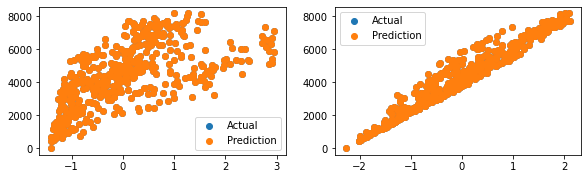



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 1.0
Residual Sum of Squares (RSS) on Training set  ---> 0.0
Mean Squared Error (MSE) on Training set       ---> 0.0
Root Mean Squared Error (RMSE) on Training set ---> 5.3346417e-13

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 1.0
Residual Sum of Squares (RSS) on Training set  ---> 0.0
Mean Squared Error (MSE) on Training set       ---> 0.0
Root Mean Squared Error (RMSE) on Training set ---> 5.1329557e-13

--------------------Residual Plots--------------------


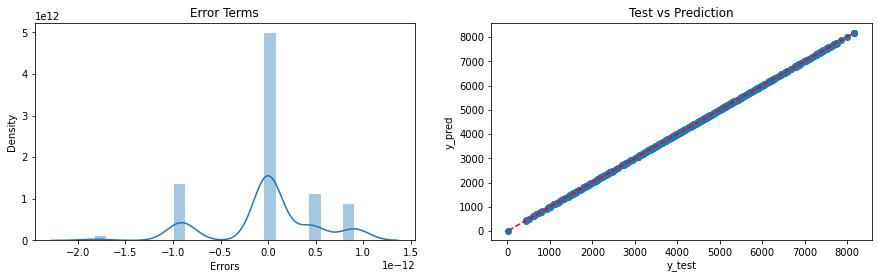

In [ ]:
#Linear Regression

MLR = LinearRegression().fit(Train_X_std,Train_Y)
pred1 = MLR.predict(Train_X_std)
pred2 = MLR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Multiple Linear Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(0, pred1, pred2)

In [ ]:
EMC = Model_Evaluation_Comparison_Matrix.copy()
EMC


,Train-R2,Test-R2,Train-RSS,Test-RSS,Train-MSE,Test-MSE,Train-RMSE,Test-RMSE
0,1.0,1.0,0.0,0.0,0.0,0.0,5.334642e-13,5.132956e-13
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00


# Project Outcomes 



*   The Dataset was quiet small with just 730 samples & after preprocessing 7.9% of the datasamples were dropped.

*   Visualising the distribution of data & their relationships, helped us to get some insights on the feature-set.

*   The features had high multicollinearity, hence in Feature Extraction step, we shortlisted the appropriate features with VIF Technique.




